$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [153]:
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer ,SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

**About the data**

1.ID - Represents a unique identification of an entry.

2.CUSTOMER ID - This represents the unique identification of a person.

3.MONTH - Represents the month of the year.

4.NAME - Represents the name of a person.

5.AGE - Represents the age of the person.

6.SSN - Represents the social security number of the person.

7.OCCUPATION - Represents the occupation of the person.

8.ANNUAL INCOME - Represents the yearly income of the person.

9.MONTHLY IN-HAND SALARY - Represents the monthly base salary of a person.

10.NUM BANK ACCOUNTS - This represents the number of bank accounts a person holds.

11.NUM CREDIT CARD - This represents the number of other credit cards held by the person.

12.INTEREST Rate - This represents the interest rate on a credit card.

13.NUM OF LOAN - Represents the number of loans taken from the bank.

14.TYPE OF LOAN - Represents the type of loan taken by the person.

15.DELAY FROM DUE DATE - Represents the average number of days delayed from the payment date.

16.NUM OF DELAYED PAYMENT - Represents the average number of payments delayed by a person.

17.CHANGED CREDIT LIMIT - This represents the percentage change in the credit card limit.

18.NUM CREDIT INQUIRIES - Represents the number of credit card inquiries.

19.CREDIT MIX - This represents the classification of the mix of credits.

20.OUTSTANDING DEBT - This represents the remaining debt to be paid(in USD).

21.CREDIT UTILIZATION RATIO - This represents the utilization ratio of credit cards.

22.CREDIT HISTORY AGE - This represents the age of the credit history of the person.

23.PAYMENT OF MIN AMOUNT - Represents whether only the minimum amount was paid by the person.

24.TOTAL EMI PER MONTH - Represents the monthly EMI payments(in USD).

25.AMOUNT INVESTED MONTHLY - Represents the monthly amount invested by the customer(in USD)

26.PAYMENT BEHAVIOUR - Represents the payment behavior of the customer (in USD)

27.MONTHLY BALANCE - Represents the monthly amount of the customer (in USD)


----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [154]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

----------------

# `03` Exploratory Data Analysis (EDA)

In [155]:
#length of train 
len_train=len(train)
len_train

100000

In [156]:
#length of test 
len_test=len(test)
len_test

50000

In [157]:
train.head(1)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [159]:
#to see the types of the data 
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### we have some columns we must handle them like age must be integer and annual_income ,monthely_incom and .....

In [160]:
#check for null percentage
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### we have null values needed to be handled 

In [161]:
#simple stastistical analysis
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


#### I think data is skewed because there is difference between 75% and max value ,and there is outliers data values 


In [162]:
#describe for categorical data 
train.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [163]:
train.duplicated().sum()

0

 there are no duplicates recoreds 

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [164]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [165]:
train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

there is balance between poor and good in our data but score of standard is more

In [166]:
train['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

there is ---------  counted 7062 must be handled 

In [167]:
train['Occupation'].replace("_______","Others",inplace=True)
train['Occupation'].unique()

array(['Scientist', 'Others', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [168]:
train['Annual_Income'].value_counts().head()

Annual_Income
36585.12    16
20867.67    16
17273.83    16
9141.63     15
33029.66    15
Name: count, dtype: int64

there in _ in last of some numbers  we want to replace it 

In [169]:
train['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [170]:
train['Annual_Income'].replace("_","Others",inplace=True)
train['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [171]:
train['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [172]:
train['SSN'].value_counts()

SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

In [173]:
train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [174]:
train['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

we need to handle values of age because there is ---, and values are abonrmal like 1342, 4808 and 500 and so on

In [175]:
train['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [176]:
train['Month'].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [177]:
#convert month variable 
# train.Month=pd.to_datetime(train.Month,format)

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

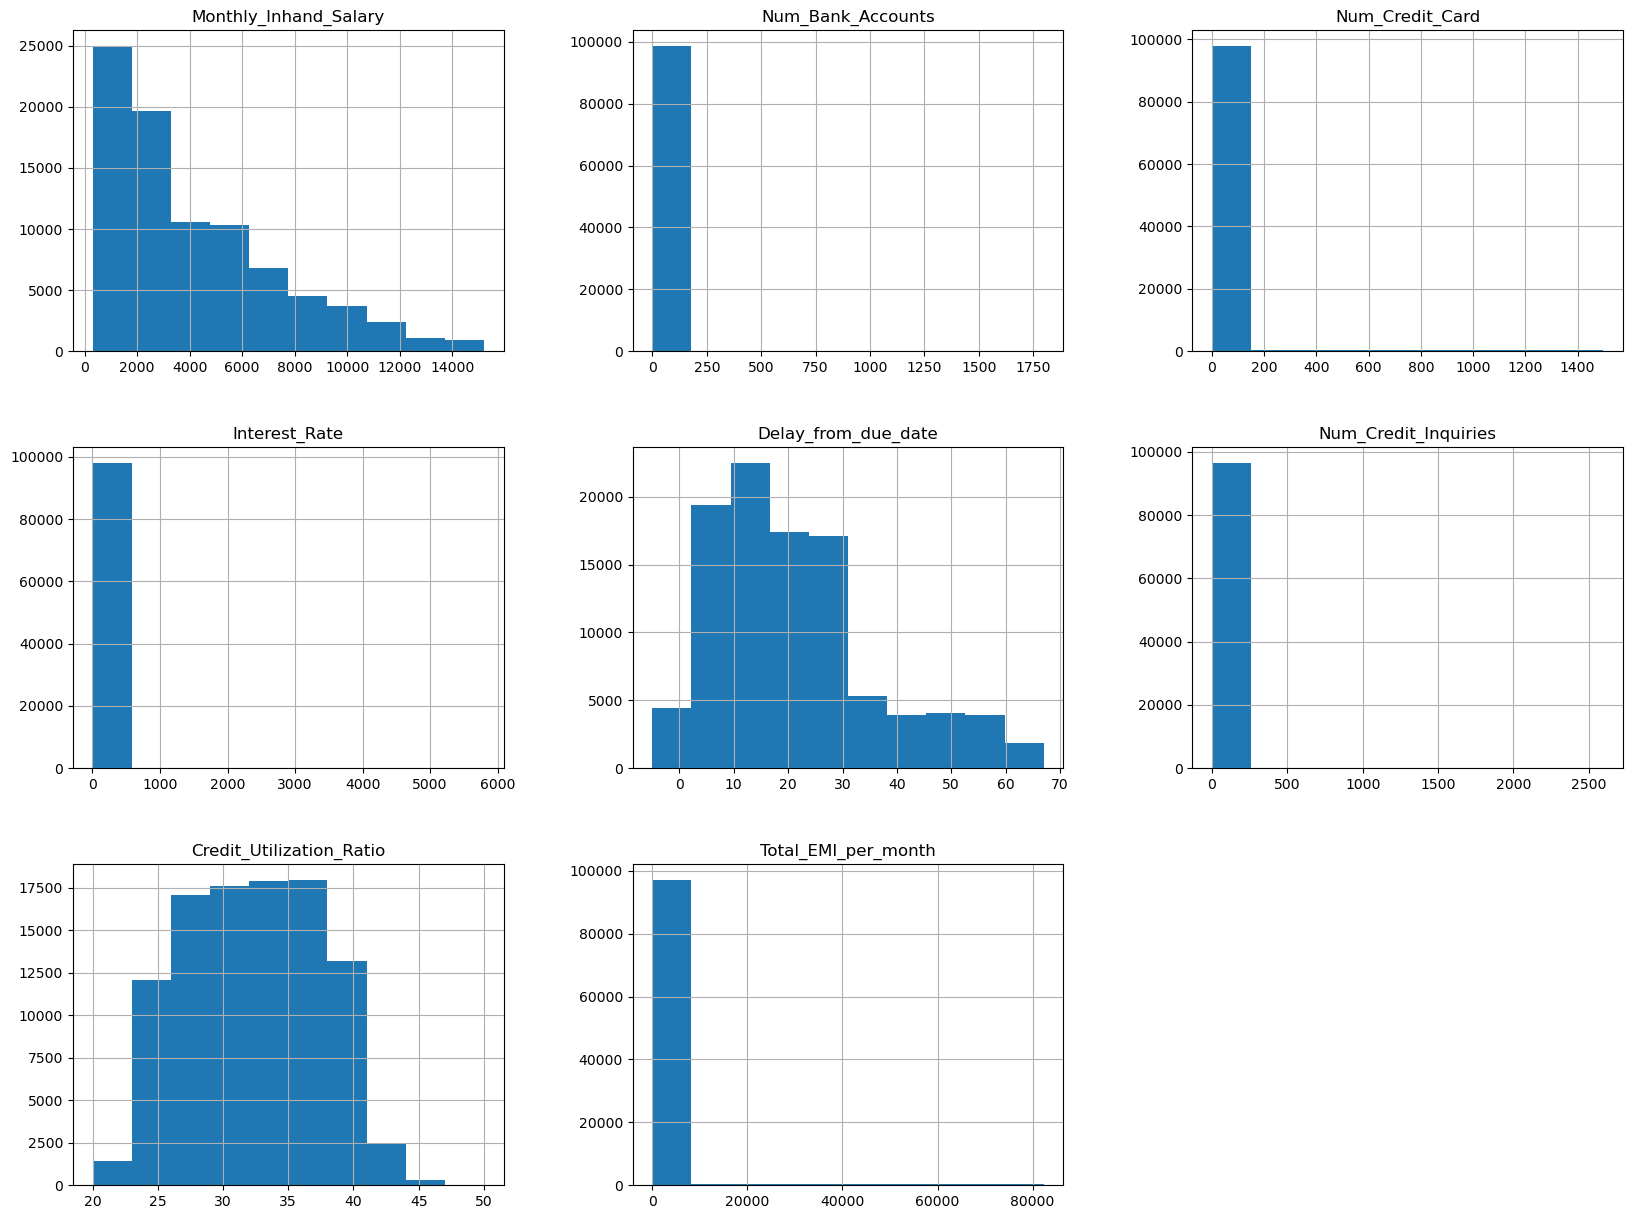

In [178]:
train.hist(figsize=(20,15))
plt.show()

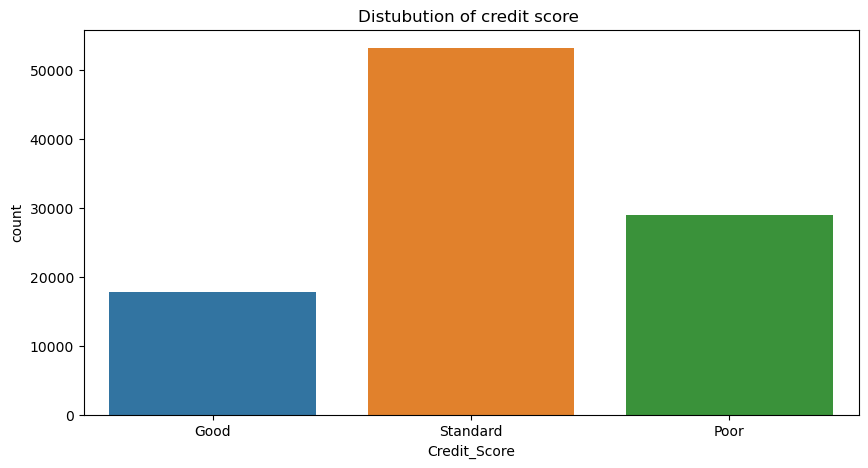

In [179]:
plt.figure(figsize=(10,5))
sns.countplot(data=train , x='Credit_Score')
plt.title("Distubution of credit score ")
plt.show()

we notice that most of people has a standard credit score

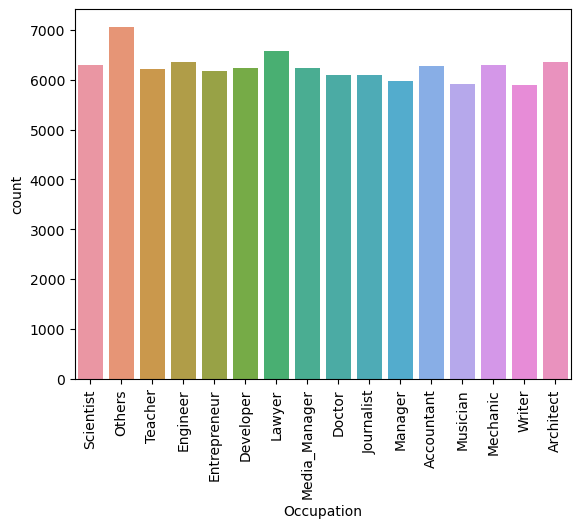

In [180]:
sns.countplot(x=train['Occupation'])
plt.xticks(rotation=90)
plt.show()

we noticed there is balance between people expect others 

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

### Editing Numeric Data

The term "extract" is often used to extract specific information or elements from a data set.


'\d': This is a class of abbreviation characters used in regular expressions and represents any number between 0 and 9.

'+': This quantifier means "one or more occurrences of the previous element". In this case it applies to \d and specifies that 
one or more digits must match.

Therefore, '(\d+)' generally means "match and capture one or more consecutive digits"

### there is unimportant columns will drop it first 

In [181]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [182]:
def dirty_data_finding(df):
    dirty = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        dirty.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

dirty_data_finding(train)

,column,dtype,nunique,null,duplicates
0,ID,object,100000,0,0
1,Customer_ID,object,12500,0,87500
2,Month,object,8,0,99992
3,Name,object,10139,9985,89860
4,Age,object,1788,0,98212
5,SSN,object,12501,0,87499
6,Occupation,object,16,0,99984
7,Annual_Income,object,18940,0,81060
8,Monthly_Inhand_Salary,float64,13235,15002,86764
9,Num_Bank_Accounts,int64,943,0,99057


In [184]:
df_train.shape

(49381, 19)

In [185]:
#drop non useful data 
del_columns=['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age','Num_of_Loan','Credit_Score']
df_train = train.drop(del_columns, axis=1)



Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)

In [186]:
#clean all miss understading string and string errors
df_train = df_train.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,3,7,11.27,4.0,NaN,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,23,Scientist,19114.12,NaN,3,4,3,-1,NaN,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,-500,Scientist,19114.12,NaN,3,4,3,3,7,NaN,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,23,Scientist,19114.12,NaN,3,4,3,5,4,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,23,Scientist,19114.12,1824.843333,3,4,3,6,NaN,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,23,7,11.5,3.0,NaN,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228
99996,25,Mechanic,39628.99,3359.415833,4,6,7,18,7,11.5,3.0,NaN,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,27,6,11.5,3.0,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083
99998,25,Mechanic,39628.99,3359.415833,4,6,7,20,NaN,11.5,3.0,Good,502.38,33.638208,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979


In [187]:
#covert types of object to its sutable type
df_train.Age=df_train.Age.astype(int)
df_train.Annual_Income=df_train.Annual_Income.astype(float)
df_train.Num_of_Delayed_Payment=df_train.Num_of_Delayed_Payment.astype(float)
df_train.Changed_Credit_Limit=df_train.Changed_Credit_Limit.astype(float)
df_train.Outstanding_Debt=df_train.Outstanding_Debt.astype(float)
df_train.Amount_invested_monthly=df_train.Amount_invested_monthly.astype(float)
df_train.Monthly_Balance=df_train.Monthly_Balance.astype(float)

In [188]:
df_train.shape

(100000, 19)

In [189]:
# import plotly.express as px
# fig = px.sunburst(df_train, path=['Credit_Score', 'Occupation'], values='Annual_Income')
# fig.show()

<Axes: >

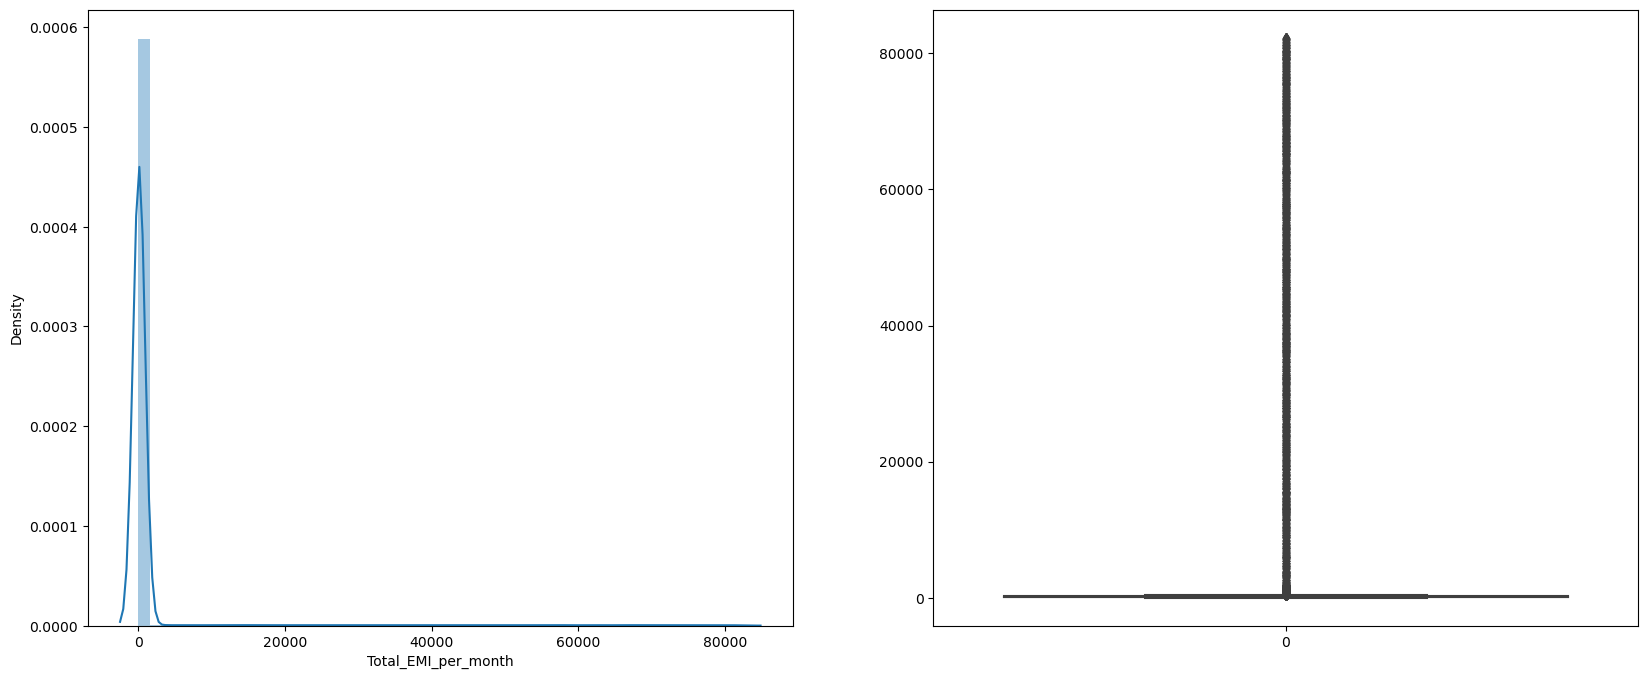

In [190]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_train['Total_EMI_per_month'])
plt.subplot(1,2,2)
sns.boxplot(df_train['Total_EMI_per_month'])

In [191]:
# percentile25 = df_train['Total_EMI_per_month'].quantile(0.25)
# percentile75 = df_train['Total_EMI_per_month'].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

In [192]:
# df_train = df_train[(df_train['Total_EMI_per_month']>lower_limit) & (df_train['Total_EMI_per_month']<upper_limit)]
# df_train = df_train.dropna()

In [193]:
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df_train['Total_EMI_per_month'])
# plt.subplot(1,2,2)
# sns.boxplot(df_train['Total_EMI_per_month'])


In [194]:
df_train.shape

(100000, 19)

In [195]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int32  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   float64
 9   Changed_Credit_Limit      97909 non-null   float64
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                79805 non-null   object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [196]:
dirty_data_finding(df_train)

,column,dtype,nunique,null,duplicates
0,Age,int32,1728,0,98272
1,Occupation,object,16,0,99984
2,Annual_Income,float64,13487,0,86513
3,Monthly_Inhand_Salary,float64,13235,15002,86764
4,Num_Bank_Accounts,int64,943,0,99057
5,Num_Credit_Card,int64,1179,0,98821
6,Interest_Rate,int64,1750,0,98250
7,Delay_from_due_date,int64,73,0,99927
8,Num_of_Delayed_Payment,float64,711,7002,99288
9,Changed_Credit_Limit,float64,4383,2091,95616


In [197]:
df_train.shape

(100000, 19)

In [199]:
from sklearn.impute import SimpleImputer

def Handle_null_columns(df_columns, method_num='median', method_cat='most_frequent', headlines=5):
    # Select numerical columns
    numerical_columns = df_columns.select_dtypes(include=['float', 'int']).columns
    categorical_columns = df_columns.select_dtypes(include=['object']).columns
    
    # Print before cleaning numerical columns
    print('Before cleaning numerical columns:\n')
    print(df_columns[numerical_columns].value_counts(dropna=False).head(headlines))
    print('\n******************************************\n')
    
    # Apply SimpleImputer with median strategy for numerical columns
    numerical_imputer = SimpleImputer(strategy=method_num)
    df_columns[numerical_columns] = numerical_imputer.fit_transform(df_columns[numerical_columns])
    
    # Print after cleaning numerical columns
    print('After cleaning numerical columns:\n')
    print(df_columns[numerical_columns].value_counts(dropna=False))
    
    # Print before cleaning categorical columns
    print('\nBefore cleaning categorical columns:\n')
    print(df_columns[categorical_columns].value_counts(dropna=False).head(headlines))
    print('\n******************************************\n')
    
    # Apply SimpleImputer with most frequent strategy for categorical columns
    categorical_imputer = SimpleImputer(strategy=method_cat)
    df_columns[categorical_columns] = categorical_imputer.fit_transform(df_columns[categorical_columns])
    
    # Print after cleaning categorical columns
    print('After cleaning categorical columns:\n')
    print(df_columns[categorical_columns].value_counts(dropna=False))
    
    return df_columns,numerical_imputer,categorical_imputer

In [200]:
df_train.Payment_of_Min_Amount.replace('NM',np.NaN,inplace = True)

In [201]:
# #function to handle null columns 
# def Handle_null_columns(df_columns,method,headlines):
#     print('before cleaning :\n')
#     print(df_columns.value_counts(dropna = False).head(headlines))
#     print('\n******************************************\n')
#     print('After cleaning: \n')
#     df_columns.fillna(method = method, inplace = True)
#     return df_columns.value_counts(dropna = False)

In [202]:
# Handle_null_columns(df_train['Changed_Credit_Limit'],'ffill',50)

In [45]:
# df_train['Credit_Mix'].fillna('Good',inplace = True)

In [203]:
df_train.shape

(100000, 19)

In [204]:
cleaned_df,num_imputer,cat_imputer = Handle_null_columns(df_train)

Before cleaning numerical columns:

Age   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance
-500  7112.665       753.722083             9                  8                16             22                   NaN                     27.68                 12.0                  4649.87           24.547185                 25.965569            31.178124                278.228515         1
 39   36446.260      2923.188333            4                  5                8              15                   9.0                     11.67                 0.0                   334.38            36.589088                 0.000000             246.744148               335.574685         1
      36941.920      3342.493333            8                  7                24  

In [205]:
df_train.shape

(100000, 19)

In [206]:
df_train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [207]:
#some condition
for credit in df_train['Changed_Credit_Limit']:
    if credit < 0:
        df_train['Changed_Credit_Limit'].replace(credit,0,inplace = True)

In [208]:
# to replace any negative values with absolute values 
# to ensure that all values in the 'Monthly_Balance' column are non-negative. If a negative value is encountered, it is replaced with its positive counterpart (absolute value).
for balance in df_train['Monthly_Balance']:
    if balance < 0 :
        df_train['Monthly_Balance'].replace(balance,-balance,inplace = True)

In [209]:
df_train.shape

(100000, 19)

In [210]:
print(df_train['Monthly_Inhand_Salary'].min())
print('\n----------------------------------------\n')
print(df_train['Monthly_Inhand_Salary'].max())

303.6454166666666

----------------------------------------

15204.633333333331


In [211]:
df_train['Age'].value_counts()


Age
38.0      2994
28.0      2968
31.0      2955
26.0      2945
32.0      2884
          ... 
1908.0       1
4583.0       1
7549.0       1
3119.0       1
1342.0       1
Name: count, Length: 1728, dtype: int64

In [212]:
df_train.shape

(100000, 19)

there is outliers in ages we must handle it 

In [213]:
age_list=[]
for ages in range (16 ,90,1):
    age_list.append(ages)

for age in df_train.Age:
    if age not in age_list:
        df_train['Age'].replace(age,random.choice(age_list),inplace = True)

In [214]:
df_train['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [215]:
df_train.shape

(100000, 19)

In [216]:
for income_value in df_train.Annual_Income:
    if income_value>39628.99:
        new_income=income_value/10
        df_train.Annual_Income.replace(income_value,new_income,inplace=True)

In [217]:
df_train.shape

(100000, 19)

In [218]:
print('Shape of the column:\n',df_train[df_train.Num_Bank_Accounts > 10].shape) 

print('Value counts of the column:\n',df_train.Num_Bank_Accounts.value_counts().head(10))

Shape of the column:
 (1324, 19)
Value counts of the column:
 Num_Bank_Accounts
6.0     13001
7.0     12823
8.0     12765
4.0     12186
5.0     12118
3.0     11950
9.0      5443
10.0     5247
1.0      4490
0.0      4328
Name: count, dtype: int64


In [219]:
df_train.shape

(100000, 19)

In [220]:
most_common_number = [0,1,2,3,4,5,6,7,8,9]
for num in df_train.Num_Bank_Accounts:
    if num not in most_common_number:
        df_train.Num_Bank_Accounts.replace(num,random.choice(most_common_number),inplace = True)

In [221]:
print('Values of the column:\n',df_train.Num_Credit_Card.unique())
print('\n----------------------------------------\n')
print('Shape of the column:\n',df_train[df_train['Num_Credit_Card'] > 10].shape) 
print('\n-----------------------------------------\n')
print('Value counts of the column:\n',df_train.Num_Credit_Card.value_counts().head(15))

Values of the column:
 [   4. 1385.    5. ...  955. 1430.  679.]

----------------------------------------

Shape of the column:
 (2307, 19)

-----------------------------------------

Value counts of the column:
 Num_Credit_Card
5.0      18459
7.0      16615
6.0      16559
4.0      14030
3.0      13277
8.0       4956
10.0      4860
9.0       4643
2.0       2149
1.0       2132
11.0        36
0.0         13
849.0        8
852.0        7
183.0        6
Name: count, dtype: int64


In [222]:
df_train.shape

(100000, 19)

In [223]:
common_credit = []
for credit in range(0,12,1):
    common_credit.append(credit)

for num_of_credit in df_train.Num_Credit_Card:
    if num_of_credit not in common_credit:
        df_train.Num_Credit_Card.replace(num_of_credit,random.choice(common_credit),inplace = True)
    

In [224]:
Num_of_Delayed_Payment=[]
for num in df_train.Num_of_Delayed_Payment:
    if num<40:
        Num_of_Delayed_Payment.append(num)
        #convert it to list to reamove duplicate values 
Num_of_Delayed_Payment=list(set(Num_of_Delayed_Payment))
for delay in df_train.Num_of_Delayed_Payment:
    if  delay<-5 or delay > 45 :
        df_train.Num_of_Delayed_Payment.replace(delay,random.choice(Num_of_Delayed_Payment),inplace=True)

In [225]:
print(df_train[df_train.Num_Credit_Inquiries > 50].shape)
print('\n--------------------------------------------------\n')
print(df_train[df_train.Num_Credit_Inquiries < 0].shape)

(1634, 19)

--------------------------------------------------

(0, 19)


In [227]:
num_of_values=[]
for num in df_train.Num_Credit_Inquiries:
    if num<45:
        num_of_values.append(num)
num_of_values=list(set(num_of_values))
for delay in df_train.Num_Credit_Inquiries:
    if delay not in num_of_values:
        df_train.Num_Credit_Inquiries.replace(delay,random.choice(num_of_values),inplace=True)
        

In [228]:
df_train.Payment_of_Min_Amount.value_counts(dropna = False)

Payment_of_Min_Amount
Yes    64333
No     35667
Name: count, dtype: int64

In [229]:
df_train.shape

(100000, 19)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [230]:
#drop non useful data 
del_columns=['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age','Num_of_Loan']
df_test = train.drop(del_columns, axis=1)
df_test=test.drop(del_columns,axis=1)

In [231]:
#clean all miss understading string and string errors
df_test = df_test.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,3,7,11.27,2022.0,Good,809.98,35.030402,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,3,9,13.27,4.0,Good,809.98,33.053114,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,24,Scientist,19114.12,1824.843333,3,4,3,-1,4,12.27,4.0,Good,809.98,33.811894,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,24,Scientist,19114.12,NaN,3,4,3,4,5,11.27,4.0,Good,809.98,32.430559,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,28,NaN,34847.84,3037.986667,2,4,6,3,1,5.42,5.0,Good,605.03,25.926822,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,Architect,20002.88,1929.906667,10,8,29,33,25,18.31,12.0,NaN,3571.7,34.780553,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,25,Mechanic,39628.99,NaN,4,6,7,20,NaN,11.5,7.0,Good,502.38,27.758522,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,25,Mechanic,39628.99,3359.415833,4,6,7,23,5,13.5,7.0,Good,502.38,36.858542,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098
49998,25,Mechanic,39628.99,NaN,4,6,7,21,6,11.5,7.0,Good,502.38,39.139840,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [232]:
#covert types of object to its sutable type
df_test.Age=df_test.Age.astype(int)
df_test.Annual_Income=df_test.Annual_Income.astype(float)
df_test.Num_of_Delayed_Payment=df_test.Num_of_Delayed_Payment.astype(float)
df_test.Changed_Credit_Limit=df_test.Changed_Credit_Limit.astype(float)
df_test.Outstanding_Debt=df_test.Outstanding_Debt.astype(float)
df_test.Amount_invested_monthly=df_test.Amount_invested_monthly.astype(float)
df_test.Monthly_Balance=df_test.Monthly_Balance.astype(float)

In [233]:
df_test['Credit_Mix'].fillna('Good',inplace = True)
# Handle_null_columns(df_test['Credit_Score'],'ffill',50)

for credit in df_test['Changed_Credit_Limit']:
    if credit < 0:
        df_test['Changed_Credit_Limit'].replace(credit,0,inplace = True)

# to replace any negative values with absolute values 
# to ensure that all values in the 'Monthly_Balance' column are non-negative. If a negative value is encountered, it is replaced with its positive counterpart (absolute value).
for balance in df_test['Monthly_Balance']:
    if balance < 0 :
        df_test['Monthly_Balance'].replace(balance,-balance,inplace = True)

num_of_values=[]
for num in df_test.Num_Credit_Inquiries:
    if num<45:
        num_of_values.append(num)
num_of_values=list(set(num_of_values))
for delay in df_test.Num_Credit_Inquiries:
    if delay not in num_of_values:
        df_test.Num_Credit_Inquiries.replace(delay,random.choice(num_of_values),inplace=True)
df_test.isnull().sum()

Age                            0
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour           3800
Monthly_Balance              562
dtype: int64

In [234]:
df_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,3,7.0,11.27,4.0,Good,809.98,35.030402,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,24,Scientist,19114.12,1824.843333,3,4,3,3,9.0,13.27,4.0,Good,809.98,33.053114,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,24,Scientist,19114.12,1824.843333,3,4,3,-1,4.0,12.27,4.0,Good,809.98,33.811894,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,24,Scientist,19114.12,NaN,3,4,3,4,5.0,11.27,4.0,Good,809.98,32.430559,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,28,NaN,34847.84,3037.986667,2,4,6,3,1.0,5.42,5.0,Good,605.03,25.926822,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,Architect,20002.88,1929.906667,10,8,29,33,25.0,18.31,12.0,Good,3571.70,34.780553,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,25,Mechanic,39628.99,NaN,4,6,7,20,NaN,11.50,7.0,Good,502.38,27.758522,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,25,Mechanic,39628.99,3359.415833,4,6,7,23,5.0,13.50,7.0,Good,502.38,36.858542,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332
49998,25,Mechanic,39628.99,NaN,4,6,7,21,6.0,11.50,7.0,Good,502.38,39.139840,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


In [237]:
df_test.isnull().sum()

Age                            0
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour           3800
Monthly_Balance              562
dtype: int64

In [238]:
df_train.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance'],
      dtype='object')

In [239]:
df_test.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance'],
      dtype='object')

In [240]:
df_test.Payment_of_Min_Amount.replace('NM',np.NaN,inplace = True)

In [241]:
df_train_cleaned, num_imputer, cat_imputer = Handle_null_columns(df_train, method_num='median', method_cat='most_frequent')

numerical_test_columns = df_test.select_dtypes(include=['float', 'int']).columns
df_test[numerical_test_columns] = num_imputer.transform(df_test[numerical_test_columns])


categorical_test_columns = df_test.select_dtypes(include=['object']).columns
df_test[categorical_test_columns] = cat_imputer.transform(df_test[categorical_test_columns])

Before cleaning numerical columns:

Age   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance
16.0  3979.706       3310.421667            8.0                6.0              19.0           17.0                 16.0                    17.88                 5.0                   1134.58           25.348643                 192.823892           104.689198               283.529076         1
40.0  4392.232       3869.193333            2.0                6.0              6.0            0.0                  4.0                     8.67                  1.0                   233.83            35.891013                 66.540929            10000.000000             367.888801         1
      4474.076       4009.396667            3.0                5.0              11.0

In [242]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  float64
 5   Num_Credit_Card           50000 non-null  float64
 6   Interest_Rate             50000 non-null  float64
 7   Delay_from_due_date       50000 non-null  float64
 8   Num_of_Delayed_Payment    50000 non-null  float64
 9   Changed_Credit_Limit      50000 non-null  float64
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Credit_Mix                50000 non-null  object 
 12  Outstanding_Debt          50000 non-null  float64
 13  Credit_Utilization_Ratio  50000 non-null  float64
 14  Paymen

In [243]:
for credit in df_test['Changed_Credit_Limit']:
    if credit < 0:
        df_test['Changed_Credit_Limit'].replace(credit,0,inplace = True)
        
        
# to replace any negative values with absolute values 
# to ensure that all values in the 'Monthly_Balance' column are non-negative. If a negative value is encountered, it is replaced with its positive counterpart (absolute value).
for balance in df_test['Monthly_Balance']:
    if balance < 0 :
        df_test['Monthly_Balance'].replace(balance,-balance,inplace = True)
        
        
age_list=[]
for ages in range (16 ,90,1):
    age_list.append(ages)

for age in df_test.Age:
    if age not in age_list:
        df_test['Age'].replace(age,random.choice(age_list),inplace = True)
        
        
        
for income_value in df_test.Annual_Income:
    if income_value>39628.99:
        new_income=income_value/10
        df_test.Annual_Income.replace(income_value,new_income,inplace=True)
        
        
most_common_number = [0,1,2,3,4,5,6,7,8,9,10]
for num in df_test.Num_Bank_Accounts:
    if num not in most_common_number:
        df_test.Num_Bank_Accounts.replace(num,random.choice(most_common_number),inplace = True)
        
        
common_credit = []
for credit in range(0,12,1):
    common_credit.append(credit)

for num_of_credit in df_test.Num_Credit_Card:
    if num_of_credit not in common_credit:
        df_test.Num_Credit_Card.replace(num_of_credit,random.choice(common_credit),inplace = True)
# df_test['Num_of_Loan'] = pd.to_numeric(df_test['Num_of_Loan'], errors='coerce')
# for i, error_Loan in enumerate(df_train['Num_of_Loan']):
#     if pd.notna(error_Loan):
#         if isinstance(error_Loan, (int, float)) and (error_Loan > 9 or error_Loan < 0):
#             df_test.at[i, 'Num_of_Loan'] = random.randint(0, 9)
            
            
Num_of_Delayed_Payment=[]
for num in df_test.Num_of_Delayed_Payment:
    if num<40:
        Num_of_Delayed_Payment.append(num)
        #convert it to list to reamove duplicate values 
Num_of_Delayed_Payment=list(set(Num_of_Delayed_Payment))
for delay in df_test.Num_of_Delayed_Payment:
    if  delay<-5 or delay > 45 :
        df_test.Num_of_Delayed_Payment.replace(delay,random.choice(Num_of_Delayed_Payment),inplace=True)
num_of_values=[]
for num in df_test.Num_Credit_Inquiries:
    if num<45:
        num_of_values.append(num)
num_of_values=list(set(num_of_values))
for delay in df_test.Num_Credit_Inquiries:
    if delay not in num_of_values:
        df_test.Num_Credit_Inquiries.replace(delay,random.choice(num_of_values),inplace=True)
        

### Encoding 

In [76]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# def Handle_null_columns(df_columns, method_num='median', method_cat='most_frequent', headlines=5):
#     # Select numerical and categorical columns
#     numerical_columns = df_columns.select_dtypes(include=['float', 'int']).columns
#     categorical_columns = df_columns.select_dtypes(include=['object']).columns
    
#     # Print before cleaning numerical columns
#     print('Before cleaning numerical columns:\n')
#     print(df_columns[numerical_columns].describe())
#     print('\n******************************************\n')
    
#     # Initialize SimpleImputer for numerical columns with median strategy
#     numerical_imputer = SimpleImputer(strategy=method_num)
    
#     # Initialize StandardScaler for numerical columns
#     scaler = StandardScaler()
    
#     # Create numerical pipeline
#     numerical_pipeline = Pipeline([
#         ('imputer', numerical_imputer),
#         ('scaler', scaler)
#     ])
    
#     # Print before cleaning categorical columns
#     print('\nBefore cleaning categorical columns:\n')
#     print(df_columns[categorical_columns].describe())
#     print('\n******************************************\n')
    
#     # Initialize SimpleImputer for categorical columns with most frequent strategy
#     categorical_imputer = SimpleImputer(strategy=method_cat)
    
#     # Initialize OneHotEncoder for categorical columns
#     encoder = OneHotEncoder(handle_unknown='ignore')
    
#     # Create categorical pipeline
#     categorical_pipeline = Pipeline([
#         ('imputer', categorical_imputer),
#         ('encoder', encoder)
#     ])
    
#     # Create ColumnTransformer to apply different preprocessing steps to numerical and categorical columns
#     preprocessor = ColumnTransformer([
#         ('num', numerical_pipeline, numerical_columns),
#         ('cat', categorical_pipeline, categorical_columns)
#     ])
    
#     # Apply preprocessing to the data
#     transformed_data = preprocessor.fit_transform(df_columns)
    
#     # Get the list of categorical columns transformed by OneHotEncoder
#     encoded_categorical_columns = list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns))
    
#     # Ensure that all categorical columns are present in the transformed data
#     missing_categorical_columns = set(encoded_categorical_columns) - set(df_columns.columns)
#     for column in missing_categorical_columns:
#         df_columns[column] = 0
    
#     # Convert the transformed data back to DataFrame
#     transformed_df = pd.DataFrame(transformed_data, columns=list(numerical_columns) + encoded_categorical_columns)
    
#     # Print after cleaning numerical columns
#     print('After cleaning and scaling numerical columns:\n')
#     print(transformed_df[numerical_columns].describe())
    
#     # Print after cleaning and encoding categorical columns
#     print('\nAfter cleaning and encoding categorical columns:\n')
#     print(transformed_df.drop(columns=numerical_columns).describe())
    
#     return transformed_df, numerical_imputer, categorical_imputer, preprocessor


In [77]:
# # Fit and transform training data
# df_train_cleaned, numerical_imputer, categorical_imputer,preprocessor = Handle_null_columns(df_train, method_num='median', method_cat='most_frequent')

# # Transform numerical columns of the test data using the fitted numerical imputer
# numerical_test_columns = df_test.select_dtypes(include=['float', 'int']).columns
# df_test[numerical_test_columns] = preprocessor.transform(df_test[numerical_test_columns])

# # Transform categorical columns of the test data using the fitted categorical imputer
# categorical_test_columns = df_test.select_dtypes(include=['object']).columns
# df_test[categorical_test_columns] = preprocessor.transform(df_test[categorical_test_columns])


In [244]:
df_train.shape

(100000, 19)

In [245]:
numerical_columns = df_train_cleaned.select_dtypes(include=['float', 'int']).columns
categorical_columns = df_train_cleaned.select_dtypes(include=['object']).columns

# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Fit and transform the data
processed_data = preprocessor.fit_transform(df_train_cleaned)


In [248]:
processed_data.shape

(100000, 42)

In [249]:
# processed_data

In [250]:
train=pd.DataFrame(processed_data)

In [251]:
train.shape

(100000, 42)

In [252]:
train

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.993745,-0.062838,-0.744337,-0.863208,-0.728935,-0.148934,-1.215932,-1.039121,0.129916,-0.452272,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.993745,-0.062838,-0.315849,-0.863208,-0.728935,-0.148934,-1.485110,0.105509,0.129916,-0.452272,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.674406,-0.062838,-0.315849,-0.863208,-0.728935,-0.148934,-1.215932,-1.039121,-0.151225,-0.452272,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.993745,-0.062838,-0.315849,-0.863208,-0.728935,-0.148934,-1.081342,-1.529677,-0.621798,-0.452272,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.993745,-0.062838,-0.744337,-0.863208,-0.728935,-0.148934,-1.014048,0.105509,0.129916,-0.452272,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.819071,0.081294,-0.226137,-0.440878,0.219606,-0.140358,0.129961,-1.039121,0.164495,-0.683662,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,-0.819071,0.081294,-0.226137,-0.440878,0.219606,-0.140358,-0.206512,-1.039121,0.164495,-0.683662,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99997,-0.819071,0.081294,-0.226137,-0.440878,0.219606,12.127547,0.399139,-1.202639,0.164495,-0.683662,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99998,-0.819071,0.081294,-0.226137,-0.440878,0.219606,-0.140358,-0.071923,0.105509,0.164495,-0.683662,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [254]:
preprocessor.transform(df_test)

array([[-0.9937449 , -0.06283825, -0.74433707, ...,  0.        ,
         0.        ,  1.        ],
       [-0.90640797, -0.06283825, -0.74433707, ...,  0.        ,
         0.        ,  0.        ],
       [-0.90640797, -0.06283825, -0.74433707, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.81907104,  0.08129399, -0.22613653, ...,  1.        ,
         0.        ,  0.        ],
       [-0.81907104,  0.08129399, -0.31584931, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81907104,  0.08129399, -0.22613653, ...,  0.        ,
         1.        ,  0.        ]])

In [255]:
test=pd.DataFrame(preprocessor.transform(df_test))

In [256]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [257]:
test

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.993745,-0.062838,-0.744337,-0.863208,-0.728935,-0.148934,-1.215932,-1.039121,0.129916,-0.452272,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.906408,-0.062838,-0.744337,-0.863208,-0.728935,-0.148934,-1.215932,-0.712084,0.430601,-0.452272,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.906408,-0.062838,-0.744337,-0.863208,-0.728935,-0.148934,-1.485110,-1.529677,0.280259,-0.452272,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.906408,-0.062838,-0.315849,-0.863208,-0.728935,-0.148934,-1.148637,-1.366158,0.129916,-0.452272,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.557060,0.047703,-0.334678,-1.285537,-0.728935,-0.142502,-1.215932,-2.020232,-0.749590,-0.220882,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3.023754,-0.056594,-0.708859,2.093098,1.168148,-0.093191,0.802907,1.904212,1.188329,1.398846,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
49996,-0.819071,0.081294,-0.315849,-0.440878,0.219606,-0.140358,-0.071923,0.105509,0.164495,0.241897,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
49997,-0.819071,0.081294,-0.226137,-0.440878,0.219606,-0.140358,0.129961,-1.366158,0.465180,0.241897,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49998,-0.819071,0.081294,-0.315849,-0.440878,0.219606,-0.140358,-0.004629,-1.202639,0.164495,0.241897,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [258]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  float64
 5   Num_Credit_Card           50000 non-null  float64
 6   Interest_Rate             50000 non-null  float64
 7   Delay_from_due_date       50000 non-null  float64
 8   Num_of_Delayed_Payment    50000 non-null  float64
 9   Changed_Credit_Limit      50000 non-null  float64
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Credit_Mix                50000 non-null  object 
 12  Outstanding_Debt          50000 non-null  float64
 13  Credit_Utilization_Ratio  50000 non-null  float64
 14  Paymen

In [84]:
# robust_scaler = RobustScaler()
# robust_scaler.fit(df_test)

# scaled_data = robust_scaler.transform(df_test)
# scaled_df = pd.DataFrame(scaled_data, columns=df_test.columns)
# df_test=scaled_df

In [85]:
# X = df_train.drop("Credit_Score", axis=1).copy()
# y = df_train["Credit_Score"].copy()
#  # to simplifiy we can make that 
# #     X = df_train.copy()
# #     y = X.pop("Credit_Score")

# # Label encoding for categoricals

# #Iterates through each column in X with data type "object."
# for colname in X.select_dtypes("object"):
#     ##factorize function to convert categorical variables into numerical representations.
#     X[colname], _ = X[colname].factorize()

# discrete_features = X.dtypes == int

# from sklearn.feature_selection import mutual_info_regression

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)

In [259]:
train_dff = pd.read_csv('train.csv')


In [260]:
train.shape

(100000, 42)

In [261]:
train_dff.shape

(100000, 28)

In [262]:
x = train
y = train_dff['Credit_Score']
label_encoder=LabelEncoder()
y_encoding=label_encoder.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y_encoding,test_size = 0.2, random_state=1234)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(80000, 42) (20000, 42) (80000,) (20000,)


----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [263]:
lg=LogisticRegression(multi_class='ovr', solver='liblinear' , random_state=1234 ,class_weight="balanced")
lg.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   random_state=1234, solver='liblinear')

In [264]:
print(lg.score(x_train,y_train))
lg.score(x_test,y_test)

0.641225


0.63775

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [265]:
y_pred=lg.predict(x_test)
y_pred

array([1, 2, 1, ..., 2, 1, 0])

In [266]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Predictions:", y_pred)
print("Accuracy:", accuracy)

Predictions: [1 2 1 ... 2 1 0]
Accuracy: 0.63775


In [267]:
accuracy = classification_report(y_test, y_pred)
print("Predictions\n:", y_pred)
print("Accuracy:\n", accuracy)

Predictions
: [1 2 1 ... 2 1 0]
Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.67      0.58      3632
           1       0.61      0.58      0.60      5759
           2       0.72      0.66      0.69     10609

    accuracy                           0.64     20000
   macro avg       0.61      0.64      0.62     20000
weighted avg       0.65      0.64      0.64     20000



In [268]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2432,  128, 1072],
       [ 741, 3334, 1684],
       [1642, 1978, 6989]], dtype=int64)

## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

Which of the two regularizations performs better?

In [269]:
r_m= LogisticRegression(multi_class='ovr', solver='liblinear' , random_state=1234 , penalty="l2" , C=0.8 , class_weight="balanced")

In [270]:
r_m.fit(x_train,y_train)

LogisticRegression(C=0.8, class_weight='balanced', multi_class='ovr',
                   random_state=1234, solver='liblinear')

In [271]:
y_pred=r_m.predict(x_test)
y_pred

array([1, 2, 1, ..., 2, 1, 0])

In [272]:
accuracy = accuracy_score(y_test, y_pred)
print("Predictions:", y_pred)
print("Accuracy:", accuracy)

Predictions: [1 2 1 ... 2 1 0]
Accuracy: 0.63775


In [273]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.6403020348048782

In [274]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2432,  128, 1072],
       [ 741, 3334, 1684],
       [1642, 1978, 6989]], dtype=int64)

## `iii` Tuning Hyperparameters

Try different `C` values and evaluate. What is the panalty value?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [275]:
param_grid = {'penalty':['l1','l2'],'C': [8,110,80]}

In [276]:
grid_search = GridSearchCV(r_m, param_grid, cv=5, scoring="f1")

In [277]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.8, class_weight='balanced',
                                          multi_class='ovr', random_state=1234,
                                          solver='liblinear'),
             param_grid={'C': [8, 110, 80], 'penalty': ['l1', 'l2']},
             scoring='f1')

In [278]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 8, 'penalty': 'l1'}


In [279]:
best_model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=1234, penalty="l1", C=8,
                           class_weight="balanced")

In [281]:
best_model.fit(x_train, y_train)
y_pred_train = best_model.predict(x_train)
y_pred_test= best_model.predict(x_test)

In [282]:
accuracy = accuracy_score(y_pred_train, y_train)
accuracy

0.6411875

In [283]:
accuracy = accuracy_score(y_pred_test, y_test)
accuracy

0.63775

In [284]:
recall = recall_score(y_pred_test, y_test , average='weighted')
recall

0.63775

------------------

# `06` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
### There is no test data 

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$